In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore') #action='once')
%matplotlib inline
features = ['checking account balance', 'duration', 'credit history',
            'purpose', 'amount', 'savings', 'employment', 'installment',
            'marital status', 'other debtors', 'residence time',
            'property', 'age', 'other installments', 'housing', 'credits',
            'job', 'persons', 'phone', 'foreign']
target = 'repaid'
df = pd.read_csv('./data/german.data', sep=' ',
                     names=features+[target]) 

Text(0.5,1,'Distribution of age')

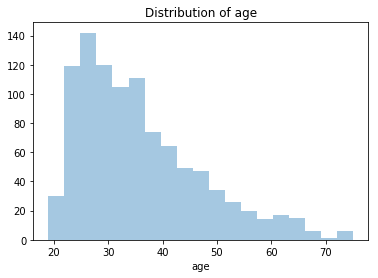

In [47]:
sns.distplot(df["age"], kde=False)
plt.title("Distribution of age")

We split the data into three groups by age:

In [48]:
df.sort_values("age", inplace=True)

df = df.assign(agegroup = [""]*len(df))
split = int(len(df)/3)
df["agegroup"].iloc[:split] = "Young"
df["agegroup"].iloc[split:2*split] = "Middle" 
df["agegroup"].iloc[2*split:] = "Old"

In [49]:
df.head()

,checking account balance,duration,credit history,purpose,amount,savings,employment,installment,marital status,other debtors,...,age,other installments,housing,credits,job,persons,phone,foreign,repaid,agegroup
391,A12,12,A32,A42,983,A64,A72,1,A92,A101,...,19,A143,A151,1,A172,1,A191,A201,1,Young
633,A14,9,A32,A42,1980,A61,A72,2,A92,A102,...,19,A143,A151,2,A173,1,A191,A201,2,Young
513,A12,12,A33,A43,585,A61,A73,4,A94,A102,...,20,A143,A151,2,A173,1,A191,A201,1,Young
155,A11,12,A32,A42,1282,A61,A73,2,A92,A101,...,20,A143,A151,1,A173,1,A191,A201,2,Young
410,A12,24,A32,A43,1967,A61,A75,4,A92,A101,...,20,A143,A152,1,A173,1,A192,A201,1,Young


We now look at how some of the variables are distributed in the different age segments.
First the employment variable:
```
Attribute 7:  (qualitative)
	      Present employment since
	      A71 : unemployed
	      A72 :       ... < 1 year
	      A73 : 1  <= ... < 4 years  
	      A74 : 4  <= ... < 7 years
	      A75 :       .. >= 7 years
```

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002AF464B5358>,
      dtype=object)

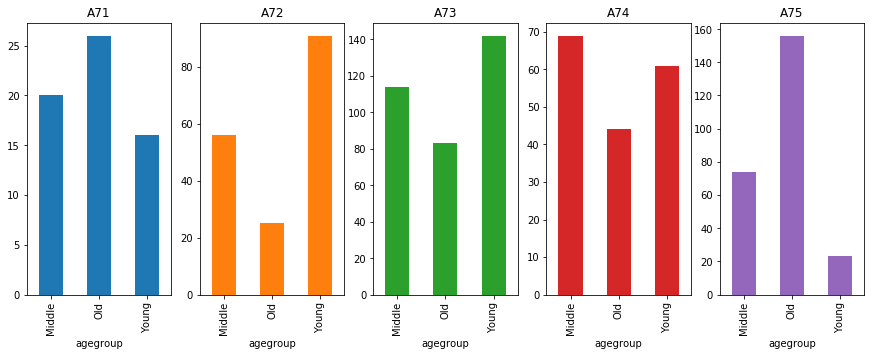

In [52]:
df.groupby('agegroup')\
    .employment.value_counts()\
    .sort_index()\
    .unstack()\
    .plot.bar(subplots=True,layout=(1,5),figsize=(15,5),legend=None)

We see that more old people are unemployed or have been in a job for a long time, whereas more young people recently started in their current job.

We now look at housing:
```
Attribute 15: (qualitative)
	      Housing
	      A151 : rent
	      A152 : own
	      A153 : for free
```

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002AF46C7F208>,
      dtype=object)

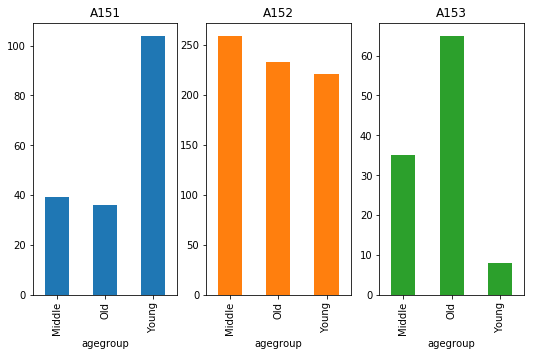

In [54]:
df.groupby('agegroup')\
    .housing.value_counts()\
    .sort_index()\
    .unstack()\
    .plot.bar(subplots=True,layout=(1,5),figsize=(15,5),legend=None)

There are clear differences between the groups on housing. Very few young people have free housing, and relatively few old and middle age people rent. This means we have a dependency between the age variable and the housing variable.

Finally, we look at whether there are differences between the groups in how often loans are paid back.

```
1 : Loan was repaid
2 : Loan was defaulted
```

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002AF47517CC0>,
      dtype=object)

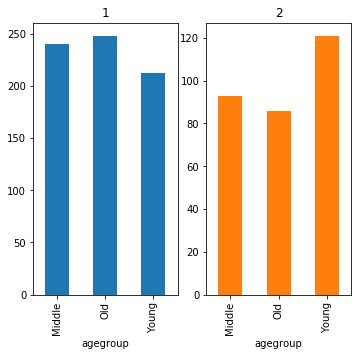

In [58]:
df.groupby('agegroup')\
    .repaid.value_counts()\
    .sort_index()\
    .unstack()\
    .plot.bar(subplots=True,layout=(1,5),figsize=(15,5),legend=None)

As can be seen, a higher percentage of young people default on their loans

In conclusion; We expect there to be differences in the decision of whether to get a loan between the groups, and we need to estimate how much of that difference is due to age and how much is due to other factors.